In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.linear_model import SGDRegressor
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [ ]:
data = pd.read_csv("happiness_data.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


A) Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical? [5 points]

In [ ]:
data.head()


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


There are total of 1949 rows and 11 columns. There is some missing data in this file. year is categorical and the remaing are continuous data.

In [ ]:
data[25:35]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
25,Algeria,2010,5.464,9.287,NaN,64.50,0.593,-0.205,0.618,NaN,NaN
26,Algeria,2011,5.317,9.297,0.810,64.66,0.530,-0.181,0.638,0.550,0.255
27,Algeria,2012,5.605,9.311,0.839,64.82,0.587,-0.172,0.690,0.604,0.230
28,Algeria,2014,6.355,9.335,0.818,65.14,NaN,NaN,NaN,0.626,0.177
29,Algeria,2016,5.341,9.362,0.749,65.50,NaN,NaN,NaN,0.661,0.377
30,Algeria,2017,5.249,9.354,0.807,65.70,0.437,-0.167,0.700,0.642,0.289
31,Algeria,2018,5.043,9.348,0.799,65.90,0.583,-0.146,0.759,0.591,0.293
32,Algeria,2019,4.745,9.337,0.803,66.10,0.385,0.005,0.741,0.585,0.215
33,Angola,2011,5.589,8.946,0.723,52.50,0.584,0.055,0.911,0.659,0.361
34,Angola,2012,4.360,8.992,0.753,53.20,0.456,-0.136,0.906,0.558,0.305


In [ ]:
# These columns have some null values. So, we have filled them with previous value.
data['Social support'] = data['Social support'].fillna(method='ffill')
data['Log GDP per capita'] = data['Log GDP per capita'].fillna(method='ffill')
data['Healthy life expectancy at birth'] = data['Healthy life expectancy at birth'].fillna(method='ffill')
data['Freedom to make life choices'] = data['Freedom to make life choices'].fillna(method='ffill')
data['Generosity'] = data['Generosity'].fillna(method='ffill')
data['Perceptions of corruption'] = data['Perceptions of corruption'].fillna(method='ffill')
data['Positive affect'] = data['Positive affect'].fillna(method='ffill')
data['Negative affect'] = data['Negative affect'].fillna(method='ffill')
data[25:35]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
25,Algeria,2010,5.464,9.287,0.710,64.50,0.593,-0.205,0.618,0.679,0.265
26,Algeria,2011,5.317,9.297,0.810,64.66,0.530,-0.181,0.638,0.550,0.255
27,Algeria,2012,5.605,9.311,0.839,64.82,0.587,-0.172,0.690,0.604,0.230
28,Algeria,2014,6.355,9.335,0.818,65.14,0.587,-0.172,0.690,0.626,0.177
29,Algeria,2016,5.341,9.362,0.749,65.50,0.587,-0.172,0.690,0.661,0.377
30,Algeria,2017,5.249,9.354,0.807,65.70,0.437,-0.167,0.700,0.642,0.289
31,Algeria,2018,5.043,9.348,0.799,65.90,0.583,-0.146,0.759,0.591,0.293
32,Algeria,2019,4.745,9.337,0.803,66.10,0.385,0.005,0.741,0.585,0.215
33,Angola,2011,5.589,8.946,0.723,52.50,0.584,0.055,0.911,0.659,0.361
34,Angola,2012,4.360,8.992,0.753,53.20,0.456,-0.136,0.906,0.558,0.305


B) Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require? [5 points]

In [ ]:
data.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1949.00000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000
mean,2013.216008,5.466705,9.37386,0.813041,63.320679,0.742786,-0.000406,0.741162,0.709789,0.268908
std,4.166828,1.115711,1.15281,0.118350,7.489910,0.142392,0.161456,0.188888,0.107088,0.085191
min,2005.000000,2.375000,6.63500,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.47400,0.750000,58.700000,0.646000,-0.113000,0.683000,0.626000,0.207000
50%,2013.000000,5.386000,9.46100,0.836000,65.140000,0.765000,-0.027000,0.799000,0.722000,0.259000
75%,2017.000000,6.283000,10.37000,0.905000,68.500000,0.856000,0.091000,0.868000,0.799000,0.320000
max,2020.000000,8.019000,11.64800,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


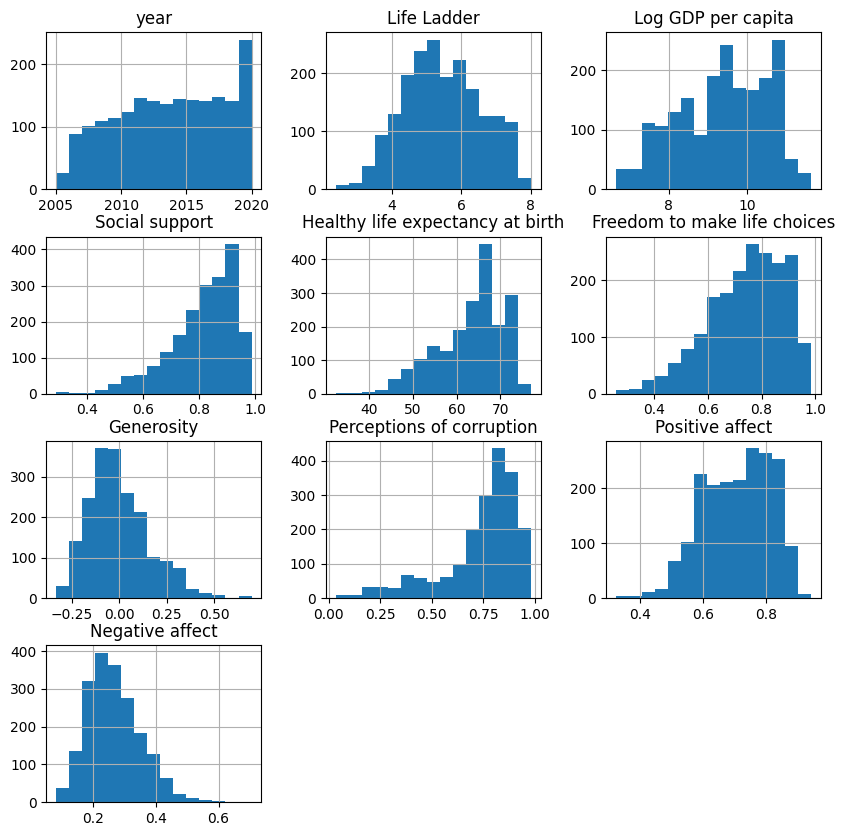

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data.hist(bins=15, figsize=(10,10))
plt.show()

The key data has no outliers and they seem to follow normal distribution with right and left squed. So, there is no special treatment required.

C) Analyze the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.

In [ ]:
corr_matrix = data.corr()
corr_matrix['Life Ladder'].sort_values(ascending=False)


<ipython-input-17-f33336cee25a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


Life Ladder                         1.000000
Log GDP per capita                  0.777296
Healthy life expectancy at birth    0.737171
Social support                      0.707290
Positive affect                     0.531678
Freedom to make life choices        0.521472
Generosity                          0.186342
year                                0.035515
Negative affect                    -0.298753
Perceptions of corruption          -0.436545
Name: Life Ladder, dtype: float64

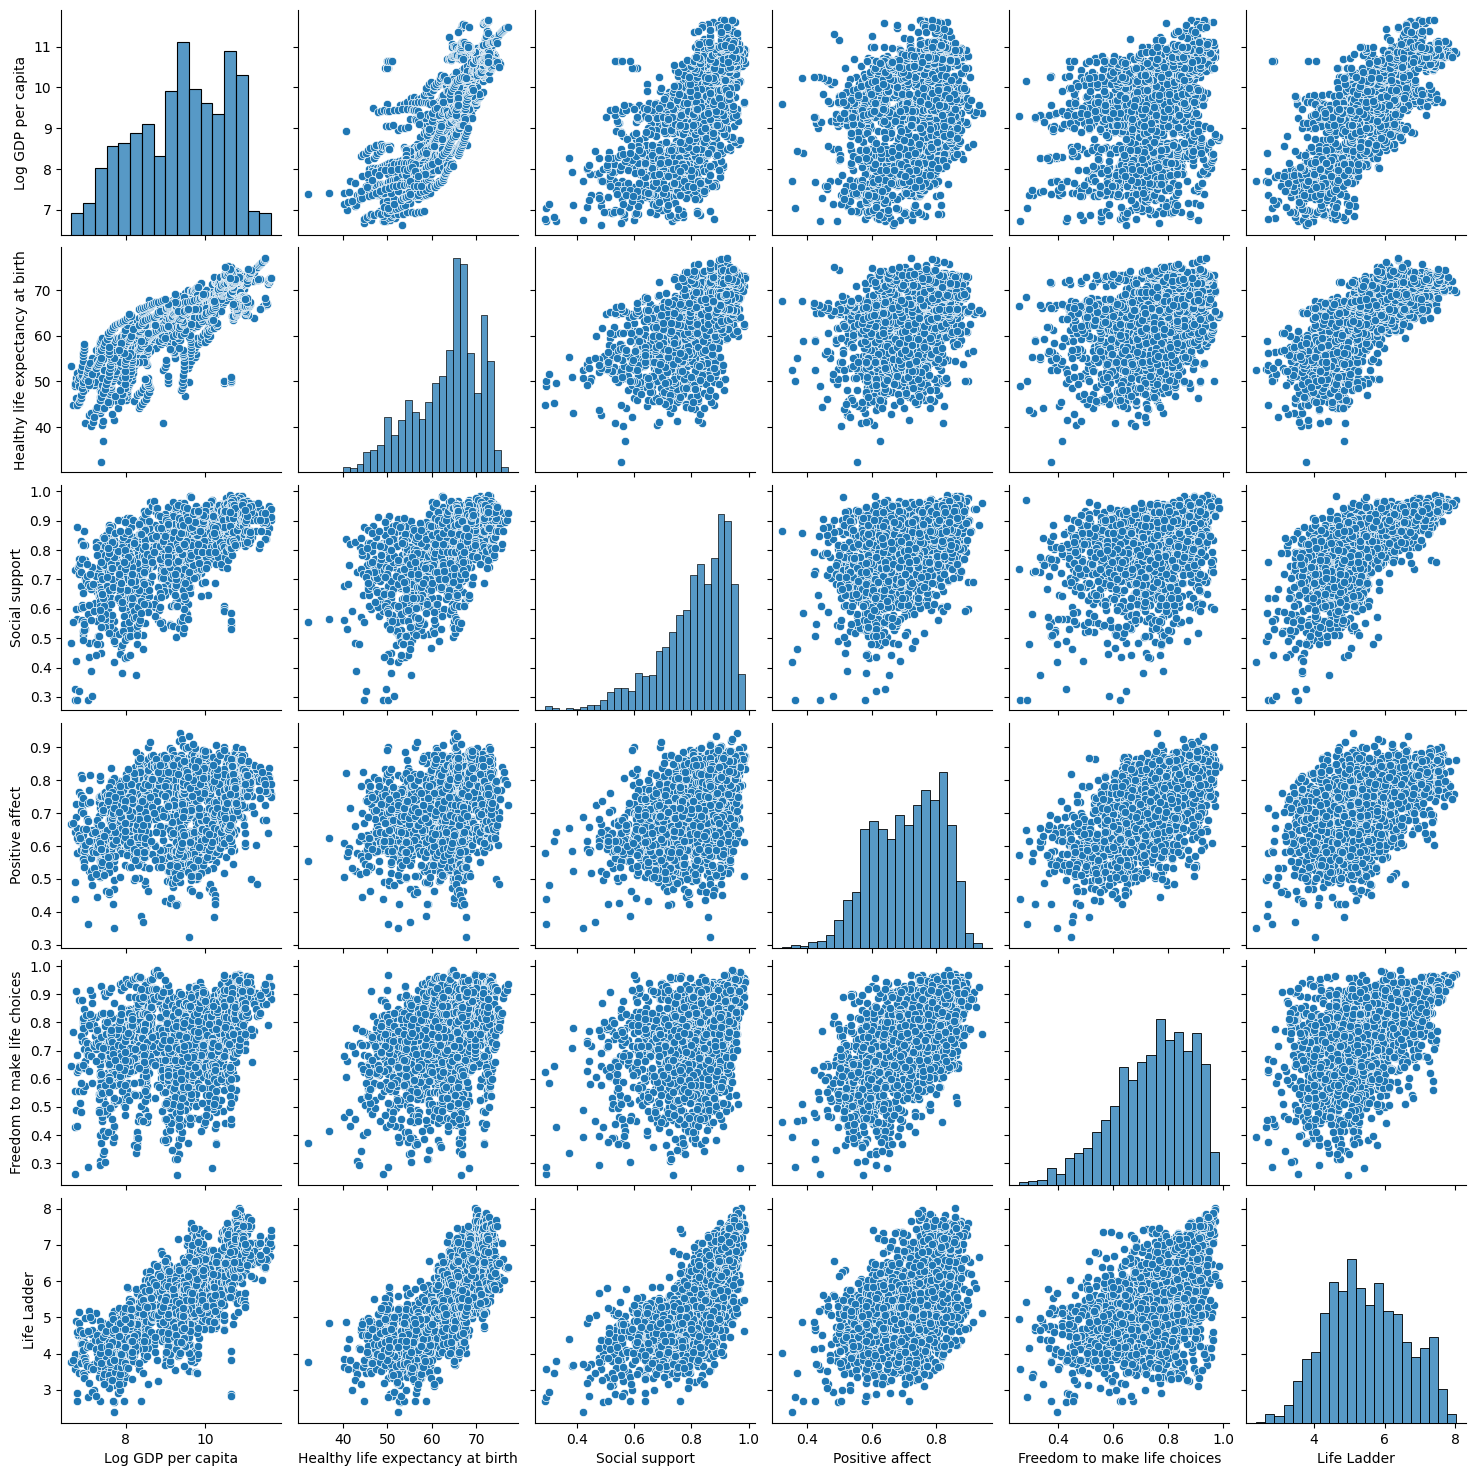

In [ ]:
# Scatter plot matrix for selected attributes
selected_attributes = ['Log GDP per capita', 'Healthy life expectancy at birth', 'Social support', 'Positive affect', 'Freedom to make life choices']
sns.pairplot(data[selected_attributes + ['Life Ladder']])
plt.show()


D) Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset. [5 points]

In [ ]:
from sklearn.model_selection import train_test_split

x = data[['Log GDP per capita', 'Healthy life expectancy at birth', 'Social support', 'Positive affect', 'Freedom to make life choices']]
y = data['Life Ladder']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#Verifying

y_test.head()
y_test.describe()
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559 entries, 862 to 1126
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Log GDP per capita                1559 non-null   float64
 1   Healthy life expectancy at birth  1559 non-null   float64
 2   Social support                    1559 non-null   float64
 3   Positive affect                   1559 non-null   float64
 4   Freedom to make life choices      1559 non-null   float64
dtypes: float64(5)
memory usage: 73.1 KB


E) Train a Linear Regression model using the training data with four-fold cross-validation using appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration. [10 points]

 **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,cross_validate


linear=LinearRegression().fit(x_train,y_train)
linear_cv=cross_validate(linear,x_train,y_train,scoring=['neg_root_mean_squared_error'],cv=4,return_train_score=True)

# print("Average MSE (Closed-Form Solution):", average_mse)

In [ ]:
print("training loss : {:,.3f}".format(-np.mean(linear_cv['train_neg_root_mean_squared_error'])))
print("validation loss : {:,.3f}".format(-np.mean(linear_cv['test_neg_root_mean_squared_error'])))

training loss : 0.558
validation loss : 0.561


## **SGD**

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
import numpy as np

# Example of scaling features and target
scaler_x = StandardScaler()
x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)

# If your target variable is highly skewed, consider a transformation
# For example, a log transformation (ensure no zero or negative values)
# y_train_transformed = np.log1p(y_train)

sgd = SGDRegressor(max_iter=2000, tol=1e-3, eta0=0.01, learning_rate='adaptive', n_iter_no_change=10, random_state=42)
sgd.fit(x_train_scaled, y_train)

sgd_cv = cross_validate(sgd, x_train_scaled, y_train, scoring=['neg_root_mean_squared_error'], cv=4, return_train_score=True)

print("Training loss: {:,.3f}".format(-np.mean(sgd_cv['train_neg_root_mean_squared_error'])))
print("Validation loss: {:,.3f}".format(-np.mean(sgd_cv['test_neg_root_mean_squared_error'])))


Training loss: 0.558
Validation loss: 0.561


**SGD, display the training and validation loss as a function of training iteration.**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stocha

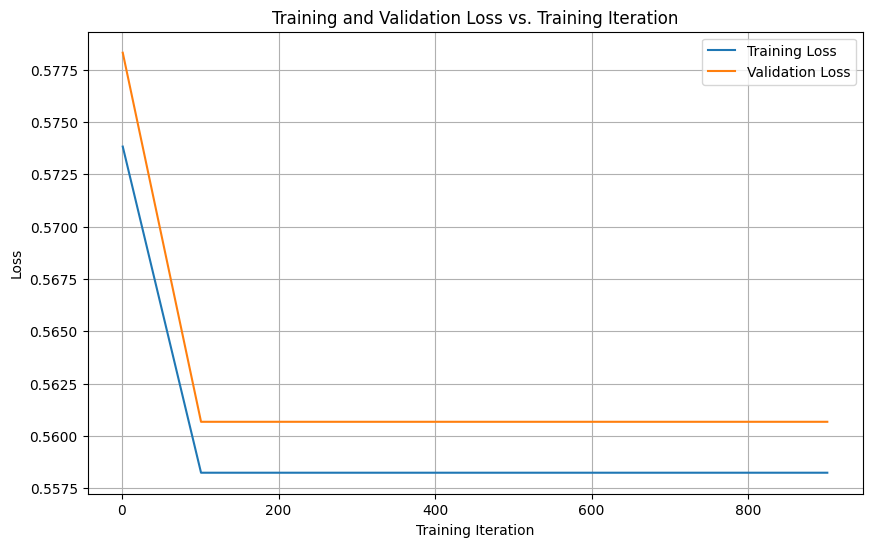

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Scale your features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

t_loss = []
v_loss = []
for i in range(1, 1001, 100):
    sgd = SGDRegressor(max_iter=i, tol=1e-3, eta0=0.01, learning_rate='adaptive', n_iter_no_change=5, random_state=42)
    sgd.fit(x_train_scaled, y_train)
    sgd_cv = cross_validate(sgd, x_train_scaled, y_train, scoring=['neg_root_mean_squared_error'], cv=4, return_train_score=True)
    t_loss.append(-np.mean(sgd_cv['train_neg_root_mean_squared_error']))
    v_loss.append(-np.mean(sgd_cv['test_neg_root_mean_squared_error']))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 1001, 100), t_loss, label='Training Loss')
plt.plot(range(1, 1001, 100), v_loss, label='Validation Loss')
plt.xlabel('Training Iteration')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss vs. Training Iteration')
plt.grid(True)
plt.show()


**Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact.**

In [ ]:
# Define a range of alpha (penalty term) values to explore
alphas = [0.01, 0.1, 1.0, 10.0]

# Initialize lists to store results
ridge_results = []
lasso_results = []
elastic_net_results = []

# Ridge Regression
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    scores = cross_val_score(ridge, x_train, y_train, cv=4, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    rmse_mean = rmse_scores.mean()
    ridge_results.append({'Alpha': alpha, 'RMSE Mean': rmse_mean})

# Lasso Regression
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    scores = cross_val_score(lasso, x_train, y_train, cv=4, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    rmse_mean = rmse_scores.mean()
    lasso_results.append({'Alpha': alpha, 'RMSE Mean': rmse_mean})

# Elastic Net
for alpha in alphas:
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5)
    scores = cross_val_score(elastic_net, x_train, y_train, cv=4, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    rmse_mean = rmse_scores.mean()
    elastic_net_results.append({'Alpha': alpha, 'RMSE Mean': rmse_mean})

# Print the results for Ridge, Lasso, and Elastic Net
print("Ridge Regression Results:")
print(ridge_results)
print("Lasso Regression Results:")
print(lasso_results)
print("Elastic Net Results:")
print(elastic_net_results)


Ridge Regression Results:
[{'Alpha': 0.01, 'RMSE Mean': 0.5607948888406902}, {'Alpha': 0.1, 'RMSE Mean': 0.560776999315218}, {'Alpha': 1.0, 'RMSE Mean': 0.5609707290623658}, {'Alpha': 10.0, 'RMSE Mean': 0.5736561972811567}]
Lasso Regression Results:
[{'Alpha': 0.01, 'RMSE Mean': 0.575770510751987}, {'Alpha': 0.1, 'RMSE Mean': 0.6875869596907271}, {'Alpha': 1.0, 'RMSE Mean': 0.7532737165688483}, {'Alpha': 10.0, 'RMSE Mean': 1.1135368907767966}]
Elastic Net Results:
[{'Alpha': 0.01, 'RMSE Mean': 0.5759641809191389}, {'Alpha': 0.1, 'RMSE Mean': 0.6803567333228986}, {'Alpha': 1.0, 'RMSE Mean': 0.7449215104728034}, {'Alpha': 10.0, 'RMSE Mean': 1.0092341161796492}]


**Ridge Regression:**

The RMSE mean values for Ridge regression remain fairly consistent across different alpha values, with only a slight variation.
This suggests that the choice of alpha in Ridge regression doesn't have a significant impact on the model's performance in this particular dataset.
Ridge regression provides stable and consistent results with minimal sensitivity to the regularization strength.

**Lasso Regression:**

Lasso regression shows a distinct behavior compared to Ridge and Elastic Net.
As alpha increases, the RMSE mean increases significantly, indicating that stronger regularization leads to poorer model performance.
The model appears to perform poorly with higher alpha values, suggesting that Lasso might not be suitable for this dataset without careful alpha tuning.

**Elastic Net:**

Elastic Net combines Ridge and Lasso regularization, and its behavior is intermediate between the two.
The RMSE mean values increase gradually as alpha increases.
Elastic Net offers a compromise between Ridge and Lasso, providing a stable performance with moderate sensitivity to alpha.

**Hypertunning with learning rate**

In [ ]:
learning_rates = [0.01, 0.1, 0.5]
#batch_sizes = [32, 64, 128]

# Initialize lists to store results
sgd_results = []

for lr_rate in learning_rates:
    #for batch_size_choosen in batch_sizes:
        sgd = SGDRegressor(learning_rate='constant', eta0=lr_rate, max_iter=100, tol=1e-3, random_state=42)
        scores = cross_val_score(sgd, x_train, y_train, cv=4, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-scores)
        rmse_mean = rmse_scores.mean()
        sgd_results.append({'Learning Rate': lr_rate,'RMSE Mean': rmse_mean})

# Print the results for SGDRegressor
print("SGDRegressor Results:")
print(sgd_results)

SGDRegressor Results:
[{'Learning Rate': 0.01, 'RMSE Mean': 18733894936426.742}, {'Learning Rate': 0.1, 'RMSE Mean': 295678707424383.4}, {'Learning Rate': 0.5, 'RMSE Mean': 1965836868284905.0}]


**Hypertuning with batch size and learning rate simultaneously**

In [ ]:
import warnings
warnings.filterwarnings("ignore")



from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Define hyperparameters
learning_rate = [0.01,0.1,1]
max_epochs = 15
batch_sizes = [32, 64, 100]  # Explore different batch sizes
for j in learning_rate:
  # Initialize the SGDRegressor
  regressor = SGDRegressor(learning_rate='constant', eta0=j, random_state=42)

  # Training loop
  for batch_size in batch_sizes:
      for epoch in range(max_epochs):
          for i in range(0, len(x_train), batch_size):
              # Get the current mini-batch
              X_batch = x_train[i:i + batch_size]
              y_batch = y_train[i:i + batch_size]

              # Update the model parameters using the mini-batch
              regressor.partial_fit(X_batch, y_batch)

          # Make predictions on the test set
          y_pred = regressor.predict(x_test)

          # Calculate Mean Squared Error on the test set
          mse = mean_squared_error(y_test, y_pred)

          # Print the batch size and test MSE for this epoch
          print(f'Learning_rate:{j},Batch Size: {batch_size}, Epoch: {epoch + 1}, Test MSE: {mse}')


Learning_rate:0.01,Batch Size: 32, Epoch: 1, Test MSE: 1.0166419776120876e+27
Learning_rate:0.01,Batch Size: 32, Epoch: 2, Test MSE: 8.879364088732973e+26
Learning_rate:0.01,Batch Size: 32, Epoch: 3, Test MSE: 2.618160007038473e+25
Learning_rate:0.01,Batch Size: 32, Epoch: 4, Test MSE: 8.904253772679308e+26
Learning_rate:0.01,Batch Size: 32, Epoch: 5, Test MSE: 8.708859473783009e+26
Learning_rate:0.01,Batch Size: 32, Epoch: 6, Test MSE: 1.7403393468974347e+24
Learning_rate:0.01,Batch Size: 32, Epoch: 7, Test MSE: 1.1726863640311359e+26
Learning_rate:0.01,Batch Size: 32, Epoch: 8, Test MSE: 5.606152176625033e+24
Learning_rate:0.01,Batch Size: 32, Epoch: 9, Test MSE: 8.424404766006248e+25
Learning_rate:0.01,Batch Size: 32, Epoch: 10, Test MSE: 1.9298851995903665e+26
Learning_rate:0.01,Batch Size: 32, Epoch: 11, Test MSE: 8.709240272112191e+26
Learning_rate:0.01,Batch Size: 32, Epoch: 12, Test MSE: 1.0233849913760201e+27
Learning_rate:0.01,Batch Size: 32, Epoch: 13, Test MSE: 1.6084820218

From the above results, it appears that the choice of batch size and learning rate significantly impacts the performance of the SGDRegressor model.

1. **Batch Size Impact:**
   - Smaller batch sizes (e.g., 32) generally result in lower Mean Squared Error (MSE) on the test set compared to larger batch sizes (e.g., 64, 100).
   - Extremely large batch sizes (e.g., 100) can lead to numerical instability and produce very high MSE values (e.g., inf).

2. **Learning Rate Impact:**
   - Lower learning rates (e.g., 0.01) tend to perform well, achieving lower MSE values.
   - Very high learning rates (e.g., 1) can lead to divergence and result in extremely high MSE values (e.g., inf).

3. **Overall Summary:**
   - A batch size of 32 with a learning rate of 0.01 appears to be a good combination for this task, resulting in the lowest MSE on the test set.
   - It's important to choose an appropriate learning rate, as values that are too high can cause divergence, while values that are too low may result in slow convergence.
   - Batch size impacts the convergence speed, with smaller batches converging faster but potentially requiring more iterations.

ABCDE